## 빅데이터 기반 AI 응용 솔루션 개발자 전문 과정

#### 교과목명 : 모델 성능 평가
- 평가일 : 08.27
- 성명 :
- 점수 :

Q1. iris data를 불러와서 붓꽃의 종류를 분류하는 모델링을 수행한 후 오차행렬과 정확도를 평가하세요.
- test_size = 0.2, 분류기는 DecisionTreeClassifier를 이용
- 정확도는 소수점 4째 자리까지 표현

In [1]:
# A.
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
# A.
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# A.
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=10)
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)


confusion = confusion_matrix(y_test,pred)
accuracy = accuracy_score(y_test,pred)

print(confusion)
print(np.round(accuracy,4))
print(y_test)

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
0.9667
[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]


Q2. Q1을 classification_report()로 평가 및 출력하세요.

In [4]:
# A.
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



Q3. train.csv 파일을 불러와서 분류모델링 평가를 아래와 같이 수행하세요.
- 하기 사항들을 처리하여 분석용 데이터셋 구축하였다. 수정이 필요한 부분을 찾아서 조치
 - 불필요한 컬럼 삭제 : ['PassengerId','Ticket','Cabin'] 
 - Null 처리 : ['Embarked','Age'] * 최빈도시, Name컬럼의 호칭 활용
 - 레이블 인코딩 : ['Sex','Embarked']
 - Age 범주화 : 6개 범주
 - 파생변수 Family : 가족수별 범주화
 - one-hot encoding : Embarked, Family_size, Age_cat
 - Fair_cat 컬럼 생성 : Fair 범주화
 
- dt, lr, rf, knn, svm 5개 분류 모델링 및 생존자 예측 정확도 평가
- dt, lr, rf, knn 모델별로 accuracy에 추가하여 confusion matrix, accuracy, precision, recall,roc auc score 평가하고 svm은 classification으로 평가하세요.

In [52]:
import pandas as pd
tdf = pd.read_csv('dataset/train.csv')

In [53]:
# 사용자 함수
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


# 불필요한 칼럼 삭제
def drop_features(df):
    df.drop(['PassengerId','Ticket','Cabin'], axis=1, inplace=True)
    return df

# Null 처리
def fillna(df):   
    most_town = df['Embarked'].value_counts(dropna=True).idxmax()
    df['Embarked'].fillna(most_town, inplace=True)
    return df

#  레이블 인코딩
def format_features(df):
    
    features=['Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

# 앞에서 설정한 Data Processing 함수 호출
def transform_features(df):
    df = drop_features(df)
    df = fillna(df)
    df = format_features(df)
    return df

tdf = transform_features(tdf)
tdf.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


In [54]:
# Null 처리 방법
# Embarked - 빈도가 가장 많은 도시로 대체
# Age - 'Name' 컬럼에 있는 호칭을 이용하여 Title 컬럼을 만들고 아래와 같은 공통 그룹 평균으로 대체

tdf['Title']= tdf.Name.str.extract('([A-Za-z]+)\.')

tdf['Title'].replace(['Mr','Miss','Mrs','Master','Rev', 'Dr','Col','Major','Ms','Mlle','Countess',
'Sir','Jonkheer','Dona','Capt','Lady','Don','Mme'], ['Mr','Miss','Mrs','Master','Mr','Other','Mr','Mr',
'Mrs','Miss','Mrs','Mr','Mr','Other','Mr','Mrs','Mr','Mms'], inplace=True)

tdf.groupby('Title').Age.describe()

tdf.loc[(tdf.Age.isnull()) & (tdf.Title == 'Mr'), 'Age'] = tdf[tdf.Title == 'Mr'].Age.mean()
tdf.loc[(tdf.Age.isnull()) & (tdf.Title == 'Miss'), 'Age'] = tdf[tdf.Title == 'Miss'].Age.mean()
tdf.loc[(tdf.Age.isnull()) & (tdf.Title == 'Mms'), 'Age'] = tdf[tdf.Title == 'Mms'].Age.mean()
tdf.loc[(tdf.Age.isnull()) & (tdf.Title == 'Mrs'), 'Age'] = tdf[tdf.Title == 'Mrs'].Age.mean()
tdf.loc[(tdf.Age.isnull()) & (tdf.Title == 'Master'), 'Age'] = tdf[tdf.Title == 'Master'].Age.mean()
tdf.loc[(tdf.Age.isnull()) & (tdf.Title == 'Other'), 'Age'] = tdf.Age.mean()
tdf.Age.isnull().sum()

def get_category(age):
    cat = ''
    if age < 10: cat = '10s'
    elif age < 20: cat = '20s'
    elif age < 30: cat = '30s'
    elif age < 40: cat = '40s'
    elif age < 50: cat = '50s'    
    else : cat = 'Elderly'
    
    return cat

tdf['Age_cat'] = tdf['Age'].apply(lambda x : get_category(x))
tdf[['Age', 'Age_cat']].head()

# 가족 수별로 카테고리화. (1인: Single, 2~4인: Small, 5인: Big)
tdf['Family'] = tdf.SibSp + tdf.Parch

def cat_size(x):
    if x == 0:
        return 'Single'
    elif x < 4:
        return 'Small'
    else:
        return 'Big'
    
tdf['Family_size'] = tdf.Family.apply(lambda x: cat_size(x))

# Embarked, Family_size, Age_cat 칼럼 one-hot encoding
tdf = pd.get_dummies(data = tdf, columns = ['Embarked'], prefix = 'Town')
tdf = pd.get_dummies(data = tdf, columns = ['Family_size'], prefix = 'Family')
tdf = pd.get_dummies(data = tdf, columns = ['Age_cat'], prefix='Age')
tdf.head()

bins = [0,4,8,14,31,513]
bin_name = [0,1,2,3,4]
tdf['Fare_cat'] = pd.cut(tdf['Fare'],bins = bins,labels=bin_name,include_lowest = True)

tdf1 =tdf.drop(['Name','Age','SibSp','Parch','Title','Family','Fare','Pclass'],axis=1)
tdf1.head()

,Survived,Sex,Town_0,Town_1,Town_2,Family_Big,Family_Single,Family_Small,Age_10s,Age_20s,Age_30s,Age_40s,Age_50s,Age_Elderly,Fare_cat
0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,4
2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,4
4,0,1,0,0,1,0,1,0,0,0,0,1,0,0,2


In [82]:
# import pandas as pd
# tdf1.to_pickle('dataset/tdf1.pkl')

import pandas as pd
tdf1 = pd.read_pickle('dataset/tdf1.pkl')
tdf1.head()

,Survived,Sex,Town_0,Town_1,Town_2,Family_Big,Family_Single,Family_Small,Age_10s,Age_20s,Age_30s,Age_40s,Age_50s,Age_Elderly,Fare_cat
0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,4
2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,4
4,0,1,0,0,1,0,1,0,0,0,0,1,0,0,2


In [83]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
X = tdf1.drop('Survived',axis=1)
y = tdf1['Survived']

# 독립변수 정규화(평균 0, 분산 1인 표준정규분포)
X = preprocessing.StandardScaler().fit(X).transform(X)

# 학습용 테이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=10) 



In [86]:
# A. dt, lr, rf, knn, svm 5개 분류 모델링 및 생존자 예측 정확도 평가
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
k_model = KNeighborsClassifier(n_neighbors=5)
svm_model = svm.SVC(kernel='rbf')

def model_val(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    print('{} 정확도: {:.4f}'.format(model,accuracy))
    
model_val(dt_model,X_train, X_test, y_train, y_test)
model_val(rf_model,X_train, X_test, y_train, y_test)
model_val(lr_model,X_train, X_test, y_train, y_test)
model_val(k_model,X_train, X_test, y_train, y_test)
model_val(svm_model,X_train, X_test, y_train, y_test)

DecisionTreeClassifier() 정확도: 0.8603
RandomForestClassifier() 정확도: 0.8380
LogisticRegression() 정확도: 0.8324
KNeighborsClassifier() 정확도: 0.8101
SVC() 정확도: 0.8436


In [113]:
# A. dt, lr, rf, knn 모델별로 accuracy에 추가하여 confusion matrix, accuracy, precision, 
# recall,roc auc score 평가
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, \
f1_score,roc_auc_score
def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    auc = roc_auc_score(y_test,pred_proba)
    
    print('오차행렬:\n', confusion)
    print('정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, f1: {:.4f}, AUC: {:.4f}'.format(accuracy, precision, recall, f1, auc))    
    

In [114]:
# A.
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
k_model = KNeighborsClassifier(n_neighbors=5)

def model_cl_val(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:,1]
    get_clf_eval(y_test,pred,pred_proba)

In [115]:
# A.
model_val(dt_model,X_train, X_test, y_train, y_test)
print()
model_cl_val(rf_model,X_train, X_test, y_train, y_test)
print()
model_cl_val(lr_model,X_train, X_test, y_train, y_test)
print()
model_cl_val(k_model,X_train, X_test, y_train, y_test)


오차행렬:
 [[106  11]
 [ 15  47]]
정확도: 0.8547, 정밀도: 0.8103, 재현율: 0.7581, f1: 0.7833, AUC: 0.8788

오차행렬:
 [[104  13]
 [ 14  48]]
정확도: 0.8492, 정밀도: 0.7869, 재현율: 0.7742, f1: 0.7805, AUC: 0.8705

오차행렬:
 [[103  14]
 [ 16  46]]
정확도: 0.8324, 정밀도: 0.7667, 재현율: 0.7419, f1: 0.7541, AUC: 0.8564

오차행렬:
 [[97 20]
 [14 48]]
정확도: 0.8101, 정밀도: 0.7059, 재현율: 0.7742, f1: 0.7385, AUC: 0.8553


In [117]:
# A. SVM

from sklearn.metrics import classification_report
from sklearn import svm
# 벡터 공간으로 매핑하는 함수를 커널이라고 함. 
# kernel='rbf'옵션으로 RBF(Radial Basis Function) 함수를 적용
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

pred = svm_model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       117
           1       0.78      0.76      0.77        62

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



Q4. Q3에서 랜덤포레스트로 생성한 모델로 교차검증(cv=5)을 수행하고 평균 정확도를 출력하세요.

In [73]:
# A. 교차검증
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_clf, X, y, scoring='accuracy',cv=5)
print('정확도:',np.round(scores,4))
print('평균 정확도:',round(np.mean(scores),4))

정확도: [0.7765 0.8034 0.7978 0.764  0.8202]
평균 정확도: 0.7924


Q5. Q3에서 랜덤포레스트로 생성한 예측모델에 대하여 교차 검증 및 성능 개선을 수행하세요.(GridSearchCV 활용)

In [74]:
# A. 교차검증 및 하이퍼파라미터 튜닝
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[50,100,200],
         'max_depth':[2, 4, 6, 8, 10],
         'min_samples_leaf':[2,8,14,20],
         'min_samples_split':[2,8.14,20]}
rf_dclf = GridSearchCV(rf_clf, param_grid=params,cv=5,refit=True)
rf_dclf.fit(X_train,y_train)
print(rf_dclf)
print('최적 하이퍼파라미터:',rf_dclf.best_params_)
print('최고 정확도:', rf_dclf.best_score_)
best_rclf = rf_dclf.best_estimator_
print(best_rclf)
rclf_pred = best_rclf.predict(X_test)
rclf_pred_proba = best_rclf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,rclf_pred,rclf_pred_proba)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [2, 8, 14, 20],
                         'min_samples_split': [2, 8.14, 20],
                         'n_estimators': [50, 100, 200]})
최적 하이퍼파라미터: {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 정확도: 0.8188121737417511
RandomForestClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=20,
                       random_state=0)
오차행렬:
 [[104  13]
 [ 13  49]]
정확도: 0.8547, 정밀도: 0.7903, 재현율: 0.7903, f1: 0.7903, AUC: 0.8754


Q6. 'dataset/diabetes.csv'을 불러와서 피마 인디언 당뇨병 예측을 수행한 후 임곗값을 0.3에서 0.5까지 변화시키면서 정밀도와 재현율이 조정되는 과정을 그래프로 표현하고 재현율을 올리면서 정확도와 정밀도를 적정하게 유지할 수 있는 임계값을 선택하여 평가를 수행하세요. 

In [119]:
# A.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('dataset/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [121]:
# A. 평가 지표 함수
def get_clf_eval(y_test=None, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)    
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬:\n',confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [123]:
# A.
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

total_count = diabetes_data.Glucose.count()

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0인 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature,
                                               zero_count,
                                               100*zero_count/total_count))

diabetes_data[zero_features]= \
diabetes_data[zero_features].replace(0,diabetes_data[zero_features].mean())

Glucose 0인 건수는 5, 퍼센트는 0.65 %
BloodPressure 0인 건수는 35, 퍼센트는 4.56 %
SkinThickness 0인 건수는 227, 퍼센트는 29.56 %
Insulin 0인 건수는 374, 퍼센트는 48.70 %
BMI 0인 건수는 11, 퍼센트는 1.43 %


In [124]:
# A.
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,
                                              test_size=0.2,
                                              random_state=156,
                                              stratify=y)
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test , pred, pred_proba)

오차 행렬:
 [[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8433


In [125]:
# A.
from sklearn.metrics import precision_recall_curve
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 
    # 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()

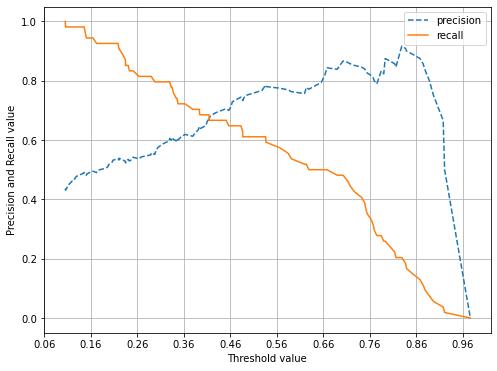

In [126]:
# A.
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)

In [127]:
# A.
from sklearn.preprocessing import Binarizer
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:',custom_threshold)
        get_clf_eval(y_test,custom_predict,pred_proba_c1)
        
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값: 0.3
오차 행렬:
 [[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963,    F1: 0.6615, AUC:0.8433
임계값: 0.33
오차 행렬:
 [[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778,    F1: 0.6774, AUC:0.8433
임계값: 0.36
오차 행렬:
 [[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222,    F1: 0.6667, AUC:0.8433
임계값: 0.39
오차 행렬:
 [[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037,    F1: 0.6667, AUC:0.8433
임계값: 0.42
오차 행렬:
 [[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667,    F1: 0.6792, AUC:0.8433
임계값: 0.45
오차 행렬:
 [[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667,    F1: 0.6857, AUC:0.8433
임계값: 0.48
오차 행렬:
 [[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,    F1: 0.6931, AUC:0.8433
임계값: 0.5
오차 행렬:
 [[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8433


In [128]:
# A.
binarizer1 = Binarizer(threshold=0.48)
pred_th_048 = binarizer1.fit_transform(pred_proba[:,1].reshape(-1,1))
print(get_clf_eval(y_test,pred_th_048,pred_proba[:,1]))

오차 행렬:
 [[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,    F1: 0.6931, AUC:0.8433
None


Q7. "dataset/auto-mpg.xlsx"을 불러와서 weight의 변화에 따른 mpg를 예측하는 회귀 모델을 생성하고 MSE, RMSE, R2로 평가를 수행하세요.

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel("dataset/auto-mpg.xlsx")
ndf = df[['mpg','weight']]
ndf.head()

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449


In [156]:
# A. 속성(변수) 선택
X=ndf[['weight']]
y=ndf['mpg']

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=11) #랜덤 추출 값 

# 단순회귀분석 모형 생성 및 평가
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_preds)
print('MSE:{0:.4f}, RMSE:{1:.4f}, R2:{2:.4f}'.format(mse,rmse,r2))

MSE:19.1351, RMSE:4.3744, R2:0.6737


Q8. 'auto-mpg.xlsx'를 불러와서 다음을 수행하세요
- 필요한 전처리를 수행하고 mpg를 종속변수, horsepower를 독립변수로 설정후 단순 선형회귀모델을 생성 및 평가
- 다항회귀모델로 변환하여 평가 

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('dataset/auto-mpg.xlsx')
ndf = df[['mpg','horsepower']]
ndf.head()

,mpg,horsepower
0,18.0,130
1,15.0,165
2,18.0,150
3,16.0,150
4,17.0,140


In [158]:
# A.
import warnings
warnings.filterwarnings('ignore')
ndf['horsepower'] = ndf.horsepower.replace('?',np.nan)
ndf.dropna(subset=['horsepower'],axis=0,inplace=True)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [159]:
# A. 변수(속성) 선택
X = ndf[['horsepower']] # 독립변수
y = ndf['mpg'] # 종속변수

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=0)

In [160]:
# A.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_preds)
print('MSE:{:.3f}, RMSE:{:.3f}, R2 score:{:.3f}'.format(mse,rmse,r2))

MSE:22.861, RMSE:4.781, R2 score:0.628


In [161]:
# A. 변수(속성) 선택
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

poly = PolynomialFeatures(degree=2) # 2차항 적용
X_train_poly = poly.fit_transform(X_train) # X_train 데이터를 2차항으로 변환

X_test_poly = poly.fit_transform(X_test)

# score 사용
pr = LinearRegression()
pr.fit(X_train_poly,y_train)
pr_preds = pr.predict(X_test_poly)

mse = mean_squared_error(y_test,pr_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,pr_preds)
print('MSE:{:.3f}, RMSE:{:.3f}, R2 score:{:.3f}'.format(mse,rmse,r2))

MSE:16.804, RMSE:4.099, R2 score:0.727


Q9. santander 은행 데이터에 대하여 필요한 전처리를 수행한 후 고객 만족, 불만족 예측 모델을 다음 2가지 방법으로 생성하고 ROC_AUC로 평가하세요.(단, n_estimators=200으로 설정)
- XGBoost
- LightGBM

In [141]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("dataset/santander/train_santander.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [142]:
# A. var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999,2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [144]:
# A.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0) # stratify=y_labels

In [153]:
# A.
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=200, random_state=10)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85830	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88237	validation_1-auc:0.84101
[17]	validation_0-auc:0.88352	validation_1-auc:0.84071
[18]	validation_0-au

In [152]:
# A.
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=200,random_state=10)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_loglos

Q10. Q9번에서 lightgbm 방식의 성능 개선 작업을 수행 후 최적의 하이퍼 파라미터를 적용하여 평가를 수행하세요.

In [151]:
# A.
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(random_state=10)

params = {'n_estimators':[100, 200],
          'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.82966	valid_0's binary_logloss: 0.150925	valid_1's auc: 0.826326	valid_1's binary_logloss: 0.159774
[3]	valid_0's auc: 0.834498	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156113
[4]	valid_0's auc: 0.83904	valid_0's binary_logloss: 0.144173	valid_1's auc: 0.831417	valid_1's binary_logloss: 0.153186
[5]	valid_0's auc: 0.841964	valid_0's binary_logloss: 0.141745	valid_1's auc: 0.834593	valid_1's binary_logloss: 0.150797
[6]	valid_0's auc: 0.845253	valid_0's binary_logloss: 0.139712	valid_1's auc: 0.836659	valid_1's binary_logloss: 0.149062
[7]	valid_0's auc: 0.846545	valid_0's binary_logloss: 0.138053	valid_1's auc: 0.836148	valid_1's binary_logloss: 0.147537
[8]	valid_0's auc: 0.848885	valid_0'

In [154]:
# A.
lgbm_clf = LGBMClassifier(n_estimators=200, num_leaves=32, sumbsample=0.8, min_child_samples=60,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.816534	valid_0's binary_logloss: 0.165167
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81932	valid_0's binary_logloss: 0.160019
[3]	valid_0's auc: 0.827935	valid_0's binary_logloss: 0.156362
[4]	valid_0's auc: 0.833269	valid_0's binary_logloss: 0.153469
[5]	valid_0's auc: 0.83486	valid_0's binary_logloss: 0.151262
[6]	valid_0's auc: 0.836656	valid_0's binary_logloss: 0.149439
[7]	valid_0's auc: 0.838769	valid_0's binary_logloss: 0.147844
[8]	valid_0's auc: 0.839353	valid_0's binary_logloss: 0.146502
[9]	valid_0's auc: 0.839985	valid_0's binary_logloss: 0.145462
[10]	valid_0's auc: 0.8401	valid_0's binary_logloss: 0.144512
[11]	valid_0's auc: 0.840377	valid_0's binary_logloss: 0.14369
[12]	valid_0's auc: 0.840823	valid_0's binary_logloss: 0.143055
[13]	valid_0's auc: 0.840551	valid_0's binary_logloss: 0.142537
[14]	valid_0's auc: 0.8399	valid_0's binary_logloss: 0.142111
[15]	va